In [1]:
import matplotlib.pyplot as plt
import numpy as np

(368, 640, 3)
The image consists of 235520 pixels


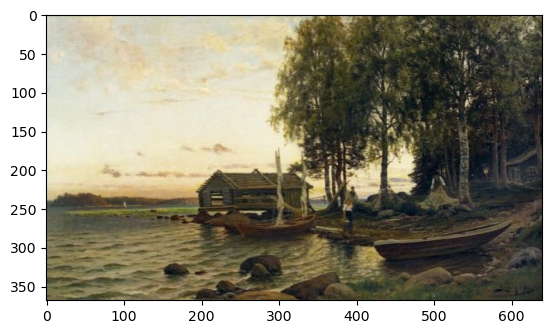

In [3]:
painting = plt.imread("painting.png")
print(painting.shape)
print(f"The image consists of {painting.shape[0] * painting.shape[1]} pixels")
plt.imshow(painting)
plt.show()

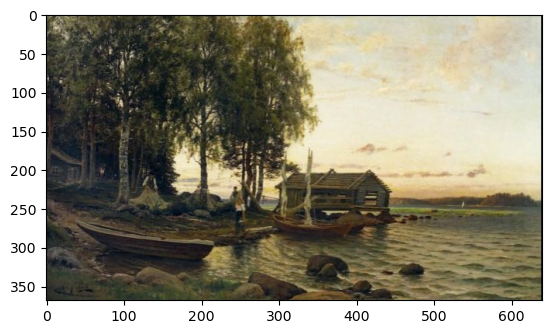

In [23]:
plt.imshow(painting[:,::-1]);  # Mirror the image in the x direction
# Semi-colon hides object text

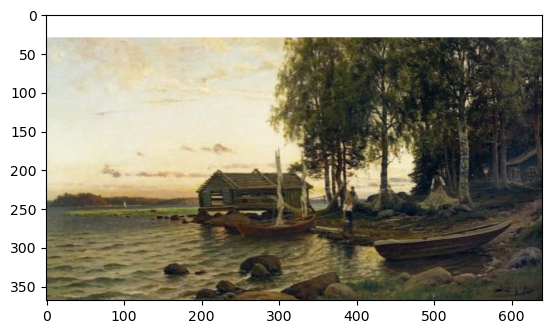

In [9]:
painting2 = painting.copy()  # Don't mess the original painting!
painting2[0:30, :, :] = 1.0  # Max value for all three components produces white
plt.imshow(painting2);

In [11]:
def fadex(image):
    height, width = image.shape[:2]
    m = np.linspace(0, 1, width).reshape(1, width, 1)
    result = image * m  # Note that we rely on broadcasting here
    return result

(368, 640, 3)


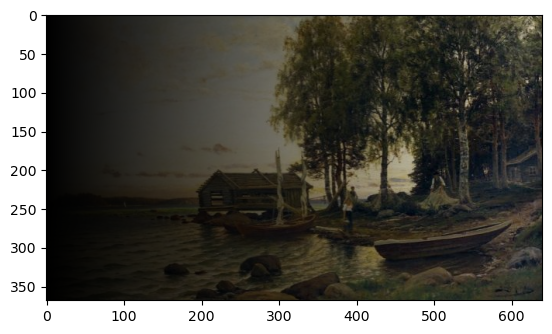

In [17]:
modified = fadex(painting)
print(modified.shape)
plt.imshow(modified);

Exercise 3.11 (to grayscale)

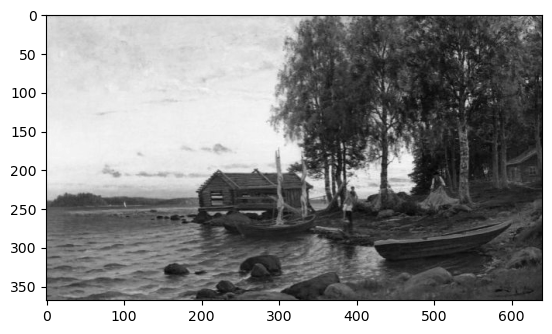

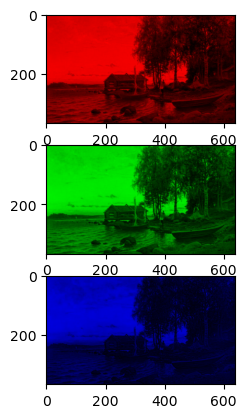

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def to_grayscale(image):
    """Converts RGB image (3D array) to gray-scale image"""
    image = image.copy()

    # Height, width, [red, green, blue]
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    
    # Apply weight conversion
    return red * 0.2126 + green * 0.7152 + blue * 0.0722

def to_red(image):
    """Zeroes out green and blue color components"""
    image = image.copy()
    image[:,:,1] = 0  # Zeroes out green
    image[:,:,2] = 0  # Zeroes out blue
    return image

def to_green(image):
    """Zeroes out red and blue color components"""
    image = image.copy()
    image[:,:,0] = 0  # Zeroes out red
    image[:,:,2] = 0  # Zeroes out blue
    return image

def to_blue(image):
    """Zeroes out red and green color components"""
    image = image.copy()
    image[:,:,0] = 0  # Zeroes out red
    image[:,:,1] = 0  # Zeroes out green
    return image

def main():
    # Convert image to 3D array
    image = plt.imread("painting.png")

    # Part 1
    plt.gray()  # Set colormap to gray
    plt.imshow(to_grayscale(image))

    # Part 2
    fig, ax = plt.subplots(nrows=3, ncols=1)

    ax[0].imshow(to_red(image))
    ax[1].imshow(to_green(image))
    ax[2].imshow(to_blue(image))

    plt.show()

if __name__ == "__main__":
    main()

Suggested solution:

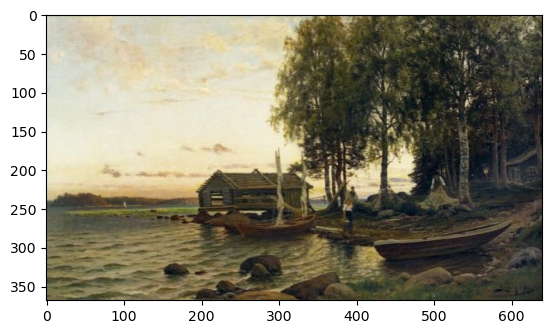

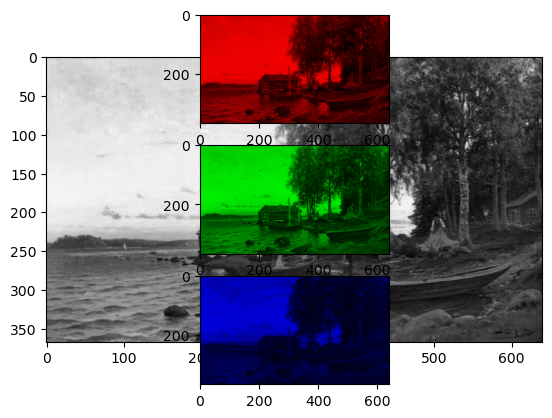

In [72]:
import numpy as np
import matplotlib.pyplot as plt
 
 
def to_grayscale(image):
    w=np.array([0.2126, 0.7152, 0.0722]).reshape(1, 1, 3)
    a = image * w
    return a.sum(axis=2)
 
def to_red(image):
    image2=image.copy()
    image2[:,:,[1,2]] = 0
    return image2
 
def to_green(image):
    image2=image.copy()
    image2[:,:,[0,2]] = 0
    return image2
 
def to_blue(image):
    image2=image.copy()
    image2[:,:,[0,1]] = 0
    return image2
 
def main():
    painting=plt.imread("painting.png")
    gray = to_grayscale(painting)
    red = to_red(painting)
    green = to_green(painting)
    blue = to_blue(painting)
    plt.imshow(painting)
    plt.figure()
    plt.gray()
    plt.imshow(gray)
    plt.subplot(3, 1, 1)
    plt.imshow(red)
    plt.subplot(3, 1, 2)
    plt.imshow(green)
    plt.subplot(3, 1, 3)
    plt.imshow(blue)
    plt.show()
 
if __name__ == "__main__":
    main()

Exercise 3.12 (radial fade)

(183.5, 319.5)
[[368.44606118 367.57924316 366.71310312 ... 366.71310312 367.57924316
  368.44606118]
 [367.94904539 367.08105372 366.21373541 ... 366.21373541 367.08105372
  367.94904539]
 [367.45407876 366.58491513 365.71642019 ... 365.71642019 366.58491513
  367.45407876]
 ...
 [367.45407876 366.58491513 365.71642019 ... 365.71642019 366.58491513
  367.45407876]
 [367.94904539 367.08105372 366.21373541 ... 366.21373541 367.08105372
  367.94904539]
 [368.44606118 367.57924316 366.71310312 ... 366.71310312 367.57924316
  368.44606118]]


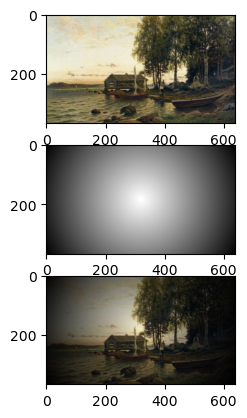

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def center(a):
    """Returns coordinate pair of image center"""
    height = a.shape[0] - 1
    width = a.shape[1] - 1
    return (height/2, width/2)   # note the order: (center_y, center_x)

def radial_distance(a):
    """Returns distance from center of image"""
    center_y, center_x = center(a)
    h, w = a.shape[:2]
    b = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            b[i,j] = np.sqrt((i - center_y)**2 + (j - center_x)**2)
    return b


def scale(a, tmin=0.0, tmax=1.0):
    """Returns a copy of array 'a' with its values scaled
    to be in the range [tmin,tmax].
    """
    if np.min(a) != np.max(a):
        a = (a - np.min(a)) / (np.max(a) - np.min(a))
        return a * (tmax - tmin) + tmin
    else:
        return a

def radial_mask(a):
    mask = radial_distance(a)
    # Fix problem with incorrect center value
    center_y, center_x = center(a)
    round_cy, round_cx = int(round(center_y)), int(round(center_x))
    fix = 1 - scale(mask)
    fix[round_cy, round_cx] = 1.0
    return fix

def radial_fade(a):
    height, width = a.shape[:2]
    mask = radial_mask(a).reshape(height, width, 1)
    return a * mask

def main():
    image = plt.imread("painting.png")

    # Part 1
    print(center(image))
    print(radial_distance(image))
    
    # Part 2
    fig, ax = plt.subplots(nrows=3, ncols=1)

    ax[0].imshow(image)
    ax[1].imshow(radial_mask(image))
    ax[2].imshow(radial_fade(image))

    plt.show()

if __name__ == "__main__":
    main()

Suggested solution:

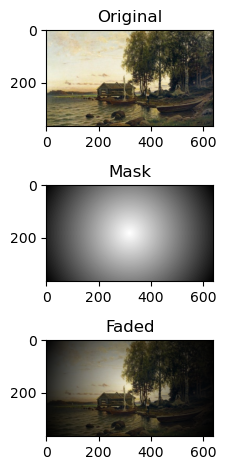

In [82]:
import numpy as np
import matplotlib.pyplot as plt
 
def center(a):
    return (a.shape[0]-1)/2, (a.shape[1]-1)/2
 
def radial_distance(a):
    cy, cx = center(a)
    x=np.abs(np.arange(a.shape[1])-cx)
    y=np.abs(np.arange(a.shape[0])-cy)
    X, Y = np.meshgrid(x, y)
    s = np.sqrt(X**2 + Y**2)
    return s
 
def scale(a, tmin=0.0, tmax=1.0):
    """Returns a copy of array 'a' with its values scaled to be in the range
[tmin,tmax]."""
    min = np.min(a)
    max = np.max(a)
    a = (a - min) / (max - min)
    a = a * (tmax - tmin) + tmin
    return a
 
def radial_mask(a):
    s = radial_distance(a)
    if s.shape[0] <= 2 or s.shape[1] <= 2:
        return np.ones(s.shape)
    mask = scale(s)
    return 1 - mask
 
def radial_fade(a):
    m = radial_mask(a)[:,:,np.newaxis]
    return a*m
 
def main():
    np.set_printoptions(linewidth=1000)
    fig, ax = plt.subplots(3,1)
    a = plt.imread("painting.png")
    ax[0].set_title("Original")
    ax[0].imshow(a)
 
    mask = radial_mask(a)
    plt.gray()
    ax[1].set_title("Mask")
    ax[1].imshow(mask)
 
    result = radial_fade(a)
    ax[2].set_title("Faded")
    ax[2].imshow(result)
 
    fig.tight_layout()
    plt.show()
 
if __name__ == "__main__":
    main()

Finding clusters in an image

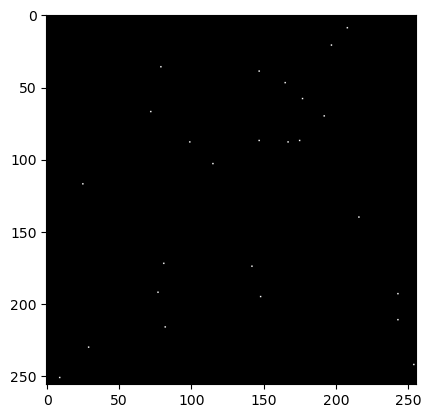

In [91]:
n = 5
l = 256
im = np.zeros((l, l))
np.random.seed(0)
points = np.random.randint(0, l, (2, n**2))  # sample n*n pixels from the array im
im[points[0], points[1]] = 1
plt.imshow(im);

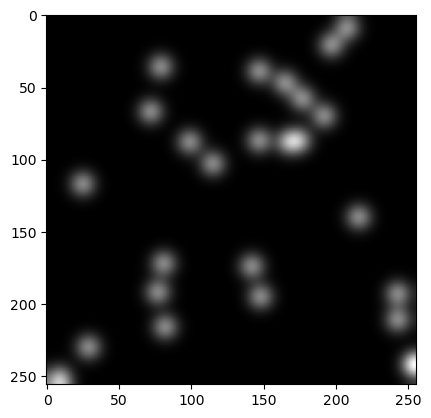

In [95]:
from scipy import ndimage
im2 = ndimage.gaussian_filter(im, sigma=l/(8.*n))  # Blur the image a bit
plt.imshow(im2);

Number of clusters is 12


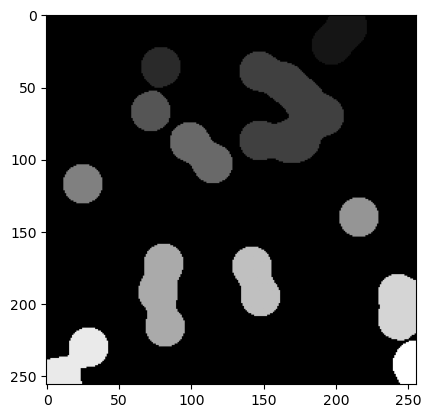

In [97]:
mask = im2 > im2.mean()  # Mask those pixels whose intensity is above mean
label_im, nb_labels = ndimage.label(mask)  # Connected components form clusters
print(f"Number of clusters is {nb_labels}")
plt.imshow(label_im);